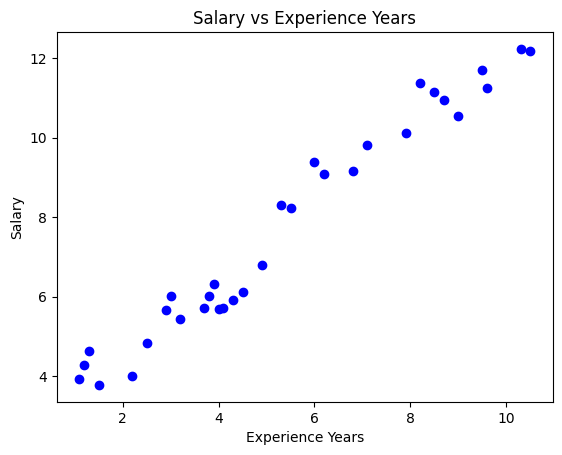

In [2]:
"""
描述: 根据工年预测工资
参考: https://www.kaggle.com/code/ybifoundation/simple-linear-regression/notebook
"""

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/salary_data.csv')
X = df['Experience Years'].values.reshape(-1, 1)  # 转为列向量
y = df['Salary'].values.reshape(-1, 1) / 10000


def plot_sample_data(X, y):
    plt.scatter(X, y, color='blue')
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience Years')
    plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

plot_sample_data(X_train, y_train)

In [23]:
import torch
import torch.nn as nn


class Network(nn.Module):
    """
    定义 3 层神经网络模型, 使用 Relu 激活函数
    """

    def __init__(self, n_in, n_hidden, n_out):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(n_in, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_out)

    def forward(self, x):
        z1 = self.fc1(x)
        a1 = torch.sigmoid(z1)
        z2 = self.fc2(a1)
        a2 = torch.sigmoid(z2)
        y = self.fc3(a2)
        return y

    def predict(self, x):
        return self.forward(x) * 10000

In [24]:
n_in = X_train.shape[1]
n_hidden = 10
n_out = 1
model = Network(n_in, n_hidden, n_out)
criteria = nn.MSELoss()
learning_rate = 0.01
iterations = 100000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = torch.from_numpy(X_train).float()
labels = torch.from_numpy(y_train).float()

for i in range(iterations):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criteria(outputs, labels)
    loss.backward()  # compute gradients
    optimizer.step()  # update weights
    if i % 1000 == 0:
        print('epoch {}, loss {}'.format(i, loss.item()))

epoch 0, loss 71.45646667480469
epoch 1000, loss 0.19293847680091858
epoch 2000, loss 0.19075126945972443
epoch 3000, loss 0.18977540731430054
epoch 4000, loss 0.18911689519882202
epoch 5000, loss 0.18862749636173248
epoch 6000, loss 0.18824206292629242
epoch 7000, loss 0.18792018294334412
epoch 8000, loss 0.18762710690498352
epoch 9000, loss 0.18732008337974548
epoch 10000, loss 0.18696433305740356
epoch 11000, loss 0.18659287691116333
epoch 12000, loss 0.18626035749912262
epoch 13000, loss 0.18597859144210815
epoch 14000, loss 0.1857406049966812
epoch 15000, loss 0.1855381578207016
epoch 16000, loss 0.1853640079498291
epoch 17000, loss 0.1852126121520996
epoch 18000, loss 0.18507897853851318
epoch 19000, loss 0.18495923280715942
epoch 20000, loss 0.18485012650489807
epoch 21000, loss 0.1847492754459381
epoch 22000, loss 0.1846546083688736
epoch 23000, loss 0.18456481397151947
epoch 24000, loss 0.18447840213775635
epoch 25000, loss 0.18439429998397827
epoch 26000, loss 0.1843121647834

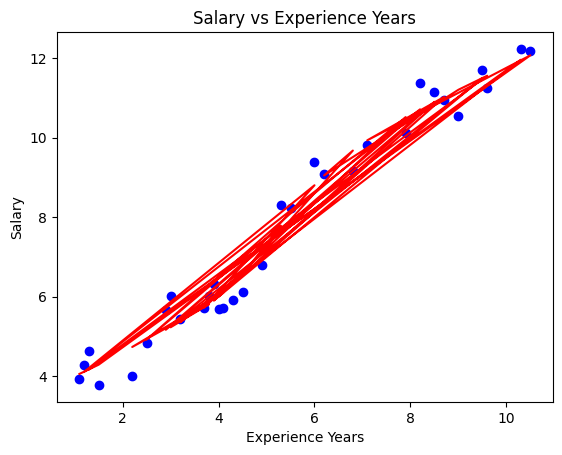

In [25]:
# 绘制线性回归的结果
def plot_linear_regression(X, y):
    import matplotlib.pyplot as plt
    plt.scatter(X, y, color='blue')
    plt.plot(X, model(torch.from_numpy(X).float()).detach().numpy(), color='red')
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience Years')
    plt.show()


plot_linear_regression(X_train, y_train)

In [28]:
# 使用测试数据集评估模型
inputs = torch.from_numpy(X_test).float()
labels = torch.from_numpy(y_test).float()
outputs = model(inputs)
loss = criteria(outputs, labels)
print('loss on test data', loss.item())

loss on test data 0.3709273934364319


In [30]:
# 根据工作年限预测工资
years = 5
salary = model.predict(torch.tensor([years]).float())
salary.item()

73115.4140625